<a href="https://colab.research.google.com/github/truong128/RNA-seq/blob/master/Coronavirus_ID_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install chembl_webresource_client

     |████████████████████████████████| 61kB 3.2MB/s 
  Created wheel for chembl-webresource-client: filename=chembl_webresource_client-0.10.4-cp37-none-any.whl size=55663 sha256=6901ff97a7dbdab10390c7dbb872f619cb9fcd655c9edc1c10e4d92cc2d04514
  Stored in directory: /root/.cache/pip/wheels/98/4c/16/bdb2ef9c937173e56b04d71fc1a6f98f0ff24992ae2e35daf3
Successfully built chembl-webresource-client


In [2]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [6]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets.shape

(8, 9)

In [7]:
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,15.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,15.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [8]:
selected_target = targets.target_chembl_id[6]
selected_target

'CHEMBL5118'

In [9]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [10]:
df = pd.DataFrame.from_dict(res)

In [11]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1988091,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,None,CHEMBL194398,None,CHEMBL194398,None,False,http://www.openphacts.org/units/Nanomolar,663132,=,1,True,=,None,IC50,nM,None,870000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,870.0
1,None,1988092,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,None,CHEMBL393608,None,CHEMBL393608,None,False,http://www.openphacts.org/units/Nanomolar,663138,=,1,True,=,None,IC50,nM,None,200000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,200.0
2,None,1988093,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,None,CHEMBL238216,None,CHEMBL238216,None,False,http://www.openphacts.org/units/Nanomolar,663137,=,1,True,=,None,IC50,nM,None,300000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,300.0
3,None,1988094,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,None,None,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,"{'bei': '7.31', 'le': '0.14', 'lle': '3.95', '...",CHEMBL235873,None,CHEMBL235873,4.82,False,http://www.openphacts.org/units/Nanomolar,663136,=,1,True,=,None,IC50,nM,None,15000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,15.0
4,None,1988095,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,None,None,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,"{'bei': '7.99', 'le': '0.16', 'lle': '4.33', '...",CHEMBL397154,None,CHEMBL397154,5.00,False,http://www.openphacts.org/units/Nanomolar,663135,=,1,True,=,None,IC50,nM,None,10000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,None,18548176,[],CHEMBL4198706,Inhibition of SARS coronavirus 3CL protease us...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,None,None,CHEMBL4196085,Eur J Med Chem,2018,"{'bei': '8.30', 'le': '0.17', 'lle': '4.99', '...",CHEMBL4208764,None,CHEMBL4301230,5.37,False,http://www.openphacts.org/units/Nanomolar,3079451,=,1,True,=,None,IC50,nM,None,4300.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,4.

In [12]:
df.to_csv('coronavirus_06_bioactivity_data_raw.csv', index=False)

In [13]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1988091,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,None,CHEMBL194398,None,CHEMBL194398,None,False,http://www.openphacts.org/units/Nanomolar,663132,=,1,True,=,None,IC50,nM,None,870000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,870.0
1,None,1988092,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,None,CHEMBL393608,None,CHEMBL393608,None,False,http://www.openphacts.org/units/Nanomolar,663138,=,1,True,=,None,IC50,nM,None,200000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,200.0
2,None,1988093,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,None,CHEMBL238216,None,CHEMBL238216,None,False,http://www.openphacts.org/units/Nanomolar,663137,=,1,True,=,None,IC50,nM,None,300000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,300.0
3,None,1988094,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,None,None,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,"{'bei': '7.31', 'le': '0.14', 'lle': '3.95', '...",CHEMBL235873,None,CHEMBL235873,4.82,False,http://www.openphacts.org/units/Nanomolar,663136,=,1,True,=,None,IC50,nM,None,15000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,15.0
4,None,1988095,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,None,None,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,"{'bei': '7.99', 'le': '0.16', 'lle': '4.33', '...",CHEMBL397154,None,CHEMBL397154,5.00,False,http://www.openphacts.org/units/Nanomolar,663135,=,1,True,=,None,IC50,nM,None,10000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,None,18548176,[],CHEMBL4198706,Inhibition of SARS coronavirus 3CL protease us...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,None,None,CHEMBL4196085,Eur J Med Chem,2018,"{'bei': '8.30', 'le': '0.17', 'lle': '4.99', '...",CHEMBL4208764,None,CHEMBL4301230,5.37,False,http://www.openphacts.org/units/Nanomolar,3079451,=,1,True,=,None,IC50,nM,None,4300.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,4.

In [14]:
len(df2.canonical_smiles.unique())

170

In [15]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1988091,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,None,CHEMBL194398,None,CHEMBL194398,None,False,http://www.openphacts.org/units/Nanomolar,663132,=,1,True,=,None,IC50,nM,None,870000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,870.0
1,None,1988092,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,None,CHEMBL393608,None,CHEMBL393608,None,False,http://www.openphacts.org/units/Nanomolar,663138,=,1,True,=,None,IC50,nM,None,200000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,200.0
2,None,1988093,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,Outside typical range,Values for this activity type are unusually la...,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,None,CHEMBL238216,None,CHEMBL238216,None,False,http://www.openphacts.org/units/Nanomolar,663137,=,1,True,=,None,IC50,nM,None,300000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,300.0
3,None,1988094,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,None,None,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,"{'bei': '7.31', 'le': '0.14', 'lle': '3.95', '...",CHEMBL235873,None,CHEMBL235873,4.82,False,http://www.openphacts.org/units/Nanomolar,663136,=,1,True,=,None,IC50,nM,None,15000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,15.0
4,None,1988095,[],CHEMBL898907,Inhibition of SARS-CoV 3C-like protease by FRE...,B,None,None,BAO_0000190,BAO_0000019,assay format,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,None,None,CHEMBL1137503,Bioorg. Med. Chem. Lett.,2007,"{'bei': '7.99', 'le': '0.16', 'lle': '4.33', '...",CHEMBL397154,None,CHEMBL397154,5.00,False,http://www.openphacts.org/units/Nanomolar,663135,=,1,True,=,None,IC50,nM,None,10000.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,None,18548176,[],CHEMBL4198706,Inhibition of SARS coronavirus 3CL protease us...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,None,None,CHEMBL4196085,Eur J Med Chem,2018,"{'bei': '8.30', 'le': '0.17', 'lle': '4.99', '...",CHEMBL4208764,None,CHEMBL4301230,5.37,False,http://www.openphacts.org/units/Nanomolar,3079451,=,1,True,=,None,IC50,nM,None,4300.0,CHEMBL5118,SARS coronavirus,Replicase polyprotein 1ab,227859,None,None,IC50,uM,UO_0000065,None,4.

In [16]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,870000.0
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,200000.0
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,300000.0
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,15000.0
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,10000.0
...,...,...,...
210,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,4300.0
211,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,5500.0
212,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,4100.0
213,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,3200.0


In [17]:
df3.to_csv('coronavirus_06_bioactivity_data_preprocessed.csv', index=False)

In [18]:
df4 = pd.read_csv('coronavirus_06_bioactivity_data_preprocessed.csv')

In [19]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [20]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,870000.0,inactive
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,200000.0,inactive
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,300000.0,inactive
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,15000.0,inactive
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,10000.0,inactive
...,...,...,...,...
165,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,4300.0,intermediate
166,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,5500.0,intermediate
167,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,4100.0,intermediate
168,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,3200.0,intermediate


In [21]:
df5.to_csv('coronavirus_03_bioactivity_data_curated.csv', index=False)

In [22]:
! zip coronavirus_06.zip *.csv

  adding: coronavirus_03_bioactivity_data_curated.csv (deflated 79%)
  adding: coronavirus_06_bioactivity_data_preprocessed.csv (deflated 78%)
  adding: coronavirus_06_bioactivity_data_raw.csv (deflated 90%)


In [23]:
! ls -l

total 176
-rw-r--r-- 1 root root  15891 Jun 24 16:00 coronavirus_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root  14185 Jun 24 15:59 coronavirus_06_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root 121243 Jun 24 15:57 coronavirus_06_bioactivity_data_raw.csv
-rw-r--r-- 1 root root  19173 Jun 24 16:01 coronavirus_06.zip
drwxr-xr-x 1 root root   4096 Jun 15 13:37 sample_data


Part #2

In [28]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-06-24 16:06:17--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   141MB/s    in 0.6s    

2021-06-24 16:06:18 (141 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [29]:
import pandas as pd

In [30]:
df = pd.read_csv('coronavirus_03_bioactivity_data_curated.csv')

In [31]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,870000.0,inactive
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,200000.0,inactive
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,300000.0,inactive
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,15000.0,inactive
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,10000.0,inactive
...,...,...,...,...
165,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,4300.0,intermediate
166,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,5500.0,intermediate
167,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,4100.0,intermediate
168,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,3200.0,intermediate


In [32]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [33]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [34]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL194398,870000.0,inactive,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...
1,CHEMBL393608,200000.0,inactive,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
2,CHEMBL238216,300000.0,inactive,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
3,CHEMBL235873,15000.0,inactive,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
4,CHEMBL397154,10000.0,inactive,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
...,...,...,...,...
165,CHEMBL4208764,4300.0,intermediate,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...
166,CHEMBL4212620,5500.0,intermediate,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...
167,CHEMBL4216101,4100.0,intermediate,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...
168,CHEMBL4217568,3200.0,intermediate,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...


Calculate Lipinski descriptors
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

Molecular weight < 500 Dalton
Octanol-water partition coefficient (LogP) < 5
Hydrogen bond donors < 5
Hydrogen bond acceptors < 10

In [35]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [36]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [37]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,580.682,2.68582,3.0,8.0
1,547.653,1.39862,4.0,8.0
2,581.670,1.59522,4.0,8.0
3,659.781,0.87060,6.0,9.0
4,625.764,0.67400,6.0,9.0
...,...,...,...,...
165,645.777,0.03880,4.0,10.0
166,524.659,2.51690,3.0,7.0
167,605.731,1.18160,4.0,10.0
168,468.551,0.95810,3.0,7.0


Combine DataFrames
Let's take a look at the 2 DataFrames that will be combined.

In [38]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,580.682,2.68582,3.0,8.0
1,547.653,1.39862,4.0,8.0
2,581.670,1.59522,4.0,8.0
3,659.781,0.87060,6.0,9.0
4,625.764,0.67400,6.0,9.0
...,...,...,...,...
165,645.777,0.03880,4.0,10.0
166,524.659,2.51690,3.0,7.0
167,605.731,1.18160,4.0,10.0
168,468.551,0.95810,3.0,7.0


In [39]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,870000.0,inactive
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,200000.0,inactive
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,300000.0,inactive
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,15000.0,inactive
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,10000.0,inactive
...,...,...,...,...
165,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,4300.0,intermediate
166,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,5500.0,intermediate
167,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,4100.0,intermediate
168,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,3200.0,intermediate


Now, let's combine the 2 DataFrame

In [40]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [41]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,870000.0,inactive,580.682,2.68582,3.0,8.0
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,200000.0,inactive,547.653,1.39862,4.0,8.0
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,300000.0,inactive,581.670,1.59522,4.0,8.0
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,15000.0,inactive,659.781,0.87060,6.0,9.0
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,10000.0,inactive,625.764,0.67400,6.0,9.0
...,...,...,...,...,...,...,...,...
165,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,4300.0,intermediate,645.777,0.03880,4.0,10.0
166,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,5500.0,intermediate,524.659,2.51690,3.0,7.0
167,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,4100.0,intermediate,605.731,1.18160,4.0,10.0
168,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,3200.0,intermediate,468.551,0.95810,3.0,7.0


Convert IC50 to pIC50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10 −9 
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [42]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [43]:
df_combined.standard_value.describe()

count       170.000000
mean      61642.588235
std      106577.599872
min         230.000000
25%        8800.000000
50%       30800.000000
75%       56595.000000
max      870000.000000
Name: standard_value, dtype: float64

In [44]:
-np.log10( (10**-9)* 100000000 )

1.0

In [45]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [46]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [47]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,inactive,580.682,2.68582,3.0,8.0,870000.0
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,547.653,1.39862,4.0,8.0,200000.0
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,581.670,1.59522,4.0,8.0,300000.0
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,659.781,0.87060,6.0,9.0,15000.0
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,625.764,0.67400,6.0,9.0,10000.0
...,...,...,...,...,...,...,...,...
165,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,intermediate,645.777,0.03880,4.0,10.0,4300.0
166,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,intermediate,524.659,2.51690,3.0,7.0,5500.0
167,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,intermediate,605.731,1.18160,4.0,10.0,4100.0
168,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,intermediate,468.551,0.95810,3.0,7.0,3200.0


In [48]:
df_norm.standard_value_norm.describe()

count       170.000000
mean      61642.588235
std      106577.599872
min         230.000000
25%        8800.000000
50%       30800.000000
75%       56595.000000
max      870000.000000
Name: standard_value_norm, dtype: float64

In [49]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,inactive,580.682,2.68582,3.0,8.0,3.060481
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,547.653,1.39862,4.0,8.0,3.698970
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,581.670,1.59522,4.0,8.0,3.522879
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,659.781,0.87060,6.0,9.0,4.823909
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,625.764,0.67400,6.0,9.0,5.000000
...,...,...,...,...,...,...,...,...
165,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,intermediate,645.777,0.03880,4.0,10.0,5.366532
166,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,intermediate,524.659,2.51690,3.0,7.0,5.259637
167,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,intermediate,605.731,1.18160,4.0,10.0,5.387216
168,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,intermediate,468.551,0.95810,3.0,7.0,5.494850


In [50]:
df_final.pIC50.describe()

count    170.000000
mean       4.607596
std        0.632736
min        3.060481
25%        4.247877
50%        4.511452
75%        5.055517
max        6.638272
Name: pIC50, dtype: float64

In [51]:
df_final.to_csv('coronavirus_04_bioactivity_data_3class_pIC50.csv')

In [52]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,inactive,580.682,2.68582,3.0,8.0,3.060481
1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,547.653,1.39862,4.0,8.0,3.698970
2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,581.670,1.59522,4.0,8.0,3.522879
3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,659.781,0.87060,6.0,9.0,4.823909
4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,625.764,0.67400,6.0,9.0,5.000000
...,...,...,...,...,...,...,...,...
154,CHEMBL3818400,CC(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CO)C(=O)N[C...,inactive,604.614,-4.32570,10.0,10.0,5.000000
155,CHEMBL3818761,CC(=O)N[C@@H](Cc1cnc[nH]1)C(=O)N[C@@H](CO)C(=O...,inactive,626.668,-3.83460,10.0,10.0,4.301030
157,CHEMBL3818028,CC(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](CO)C(=O)N[C...,inactive,605.558,-6.49640,11.0,11.0,4.698970
160,CHEMBL4209146,CC(C)C[C@H](NC(=O)OC1CCN(S(C)(=O)=O)CC1)C(=O)N...,inactive,474.580,-0.23880,3.0,7.0,4.540608


In [53]:
df_2class.to_csv('coronavirus_05_bioactivity_data_2class_pIC50.csv')

In [54]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

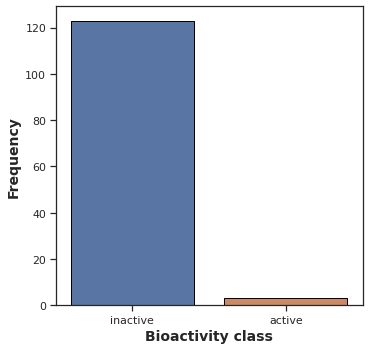

In [55]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

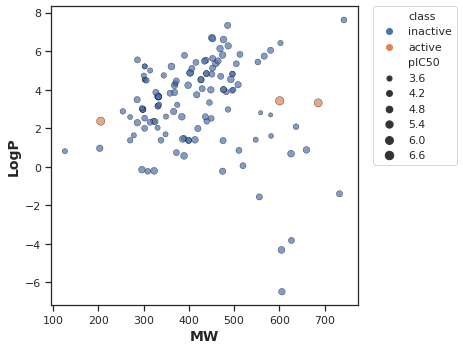

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

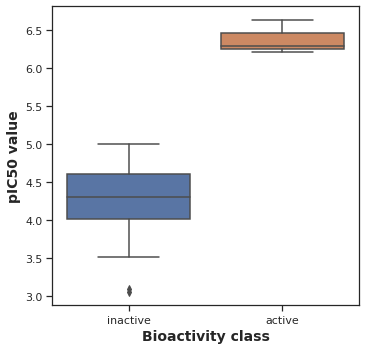

In [57]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [58]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [59]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.00159,0.05,Different distribution (reject H0)


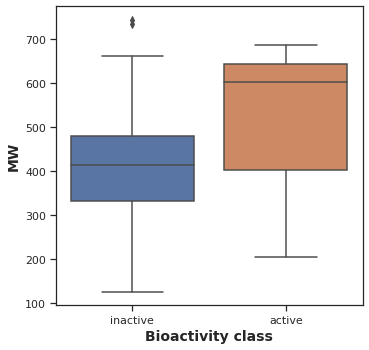

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [61]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,132.0,0.202669,0.05,Same distribution (fail to reject H0)


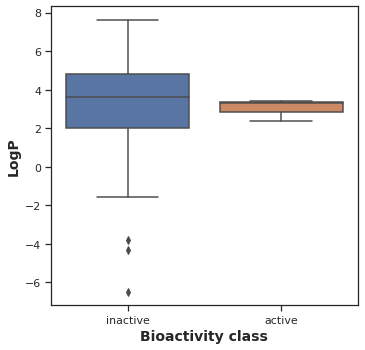

In [62]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [63]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,152.0,0.304299,0.05,Same distribution (fail to reject H0)


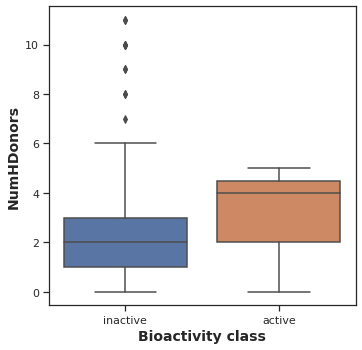

In [64]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [65]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,155.0,0.317437,0.05,Same distribution (fail to reject H0)


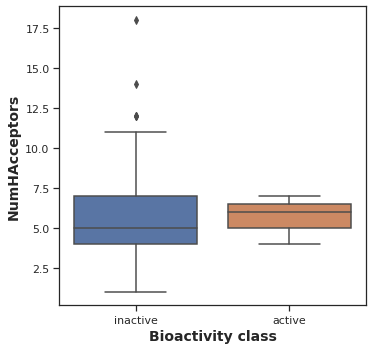

In [66]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [67]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,164.0,0.373113,0.05,Same distribution (fail to reject H0)


Box Plots
pIC50 values
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

Lipinski's descriptors
All of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.

In [68]:
! zip -r results_ID_06.zip . -i *.csv *.pdf

  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: coronavirus_05_bioactivity_data_2class_pIC50.csv (deflated 72%)
  adding: coronavirus_06_bioactivity_data_raw.csv (deflated 90%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: coronavirus_04_bioactivity_data_3class_pIC50.csv (deflated 73%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: plot_MW_vs_LogP.pdf (deflated 14%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: coronavirus_06_bioactivity_data_preprocessed.csv (deflated 78%)
  adding: coronavirus_03_bioactivity_data_curated.csv (deflated 79%)


Part #3

Download PaDEL-Descriptor

In [69]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2021-06-24 16:23:21--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2021-06-24 16:23:22--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   112MB/s    in 0.2s    

2021-06-24 16:23:24 (112 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2021-06-24 16:23:24--  https://github

In [70]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [71]:
import pandas as pd

In [72]:
df3 = pd.read_csv('coronavirus_04_bioactivity_data_3class_pIC50.csv')

In [73]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL194398,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,inactive,580.682,2.68582,3.0,8.0,3.060481
1,1,CHEMBL393608,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,547.653,1.39862,4.0,8.0,3.698970
2,2,CHEMBL238216,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,581.670,1.59522,4.0,8.0,3.522879
3,3,CHEMBL235873,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,659.781,0.87060,6.0,9.0,4.823909
4,4,CHEMBL397154,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,inactive,625.764,0.67400,6.0,9.0,5.000000
...,...,...,...,...,...,...,...,...,...
165,165,CHEMBL4208764,CC(C)C[C@H](NC(=O)OC1(Cc2ccccc2)CCN(S(C)(=O)=O...,intermediate,645.777,0.03880,4.0,10.0,5.366532
166,166,CHEMBL4212620,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H](C=O)C[C@...,intermediate,524.659,2.51690,3.0,7.0,5.259637
167,167,CHEMBL4216101,CCC1(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]...,intermediate,605.731,1.18160,4.0,10.0,5.387216
168,168,CHEMBL4217568,CCOC(=O)N1CCC(OC(=O)N[C@@H](CC(C)C)C(=O)N[C@H]...,intermediate,468.551,0.95810,3.0,7.0,5.494850


In [74]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [75]:
! cat molecule.smi | head -5

CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H](CC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)C)Cc1ccccc1	CHEMBL194398
CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)C	CHEMBL393608
CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)C	CHEMBL238216
CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H](NC(=O)[C@H](CO)NC(=O)OC(C)(C)C)C(C)C	CHEMBL235873
CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](NC(=O)[C@H](CO)NC(=O)OC(C)(C)C)C(C)C	CHEMBL397154


In [76]:
! cat molecule.smi | wc -l

170


In [77]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [78]:
! bash padel.sh

Processing CHEMBL194398 in molecule.smi (1/170). 
Processing CHEMBL393608 in molecule.smi (2/170). 
Processing CHEMBL235873 in molecule.smi (4/170). Average speed: 1.33 s/mol.
Processing CHEMBL238216 in molecule.smi (3/170). Average speed: 2.44 s/mol.
Processing CHEMBL238217 in molecule.smi (6/170). Average speed: 1.25 s/mol.
Processing CHEMBL397154 in molecule.smi (5/170). Average speed: 1.16 s/mol.
Processing CHEMBL196635 in molecule.smi (7/170). Average speed: 0.84 s/mol.
Processing CHEMBL492571 in molecule.smi (8/170). Average speed: 0.76 s/mol.
Processing CHEMBL522710 in molecule.smi (9/170). Average speed: 0.72 s/mol.
Processing CHEMBL492771 in molecule.smi (10/170). Average speed: 0.64 s/mol.
Processing CHEMBL492768 in molecule.smi (12/170). Average speed: 0.55 s/mol.
Processing CHEMBL492772 in molecule.smi (11/170). Average speed: 0.60 s/mol.
Processing CHEMBL492769 in molecule.smi (13/170). Average speed: 0.54 s/mol.
Processing CHEMBL492770 in molecule.smi (14/170). Average sp

In [79]:
! ls -l

total 109072
-rw-r--r-- 1 root root    15891 Jun 24 16:00 coronavirus_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root    25491 Jun 24 16:15 coronavirus_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root    18407 Jun 24 16:16 coronavirus_05_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root    14185 Jun 24 15:59 coronavirus_06_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root   121243 Jun 24 15:57 coronavirus_06_bioactivity_data_raw.csv
-rw-r--r-- 1 root root    19173 Jun 24 16:01 coronavirus_06.zip
-rw-r--r-- 1 root root   313523 Jun 24 16:27 descriptors_output.csv
drwxr-xr-x 3 root root     4096 Jun 24 16:23 __MACOSX
-rw-r--r-- 1 root root      121 Jun 24 16:19 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      119 Jun 24 16:18 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      131 Jun 24 16:20 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      128 Jun 24 16:19 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      120 Jun 24 16:18 mannwhitneyu_pIC50.

In [80]:
df3_X = pd.read_csv('descriptors_output.csv')

In [81]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL393608,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL194398,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL238216,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL235873,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL397154,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,CHEMBL4208764,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
166,CHEMBL4212620,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
167,CHEMBL4217568,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
168,CHEMBL4216101,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
166,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
167,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
168,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
df3_Y = df3['pIC50']
df3_Y

0      3.060481
1      3.698970
2      3.522879
3      4.823909
4      5.000000
         ...   
165    5.366532
166    5.259637
167    5.387216
168    5.494850
169    5.055517
Name: pIC50, Length: 170, dtype: float64

In [84]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.060481
1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.698970
2,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.522879
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.823909
4,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.366532
166,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.259637
167,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.387216
168,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.494850


In [85]:
dataset3.to_csv('coronavirus_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

Part #4

Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest
Chanin Nantasenamat

'Data Professor' YouTube channel

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 4, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

In [86]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [87]:
df = pd.read_csv('coronavirus_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [88]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
166,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
167,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
168,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
Y = df.pIC50
Y

0      3.060481
1      3.698970
2      3.522879
3      4.823909
4      5.000000
         ...   
165    5.366532
166    5.259637
167    5.387216
168    5.494850
169    5.055517
Name: pIC50, Length: 170, dtype: float64

In [90]:
X.shape

(170, 881)

In [91]:
Y.shape

(170,)

In [92]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [94]:
X.shape

(170, 149)

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [96]:
X_train.shape, Y_train.shape

((136, 149), (136,))

In [97]:
X_test.shape, Y_test.shape

((34, 149), (34,))

In [98]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.1401366261146777

In [99]:
Y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

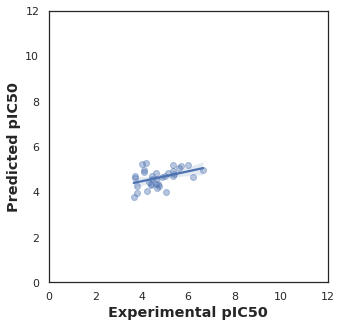

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

Part #5

Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors
Chanin Nantasenamat

'Data Professor' YouTube channel

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.

In [101]:
! pip install lazypredict

     |████████████████████████████████| 25.9 MB 897 bytes/s 
     |████████████████████████████████| 1.2 MB 38.4 MB/s 
     |████████████████████████████████| 82 kB 1.0 MB/s 
     |████████████████████████████████| 269 kB 59.0 MB/s 
     |████████████████████████████████| 14.5 MB 7.5 kB/s 
     |████████████████████████████████| 6.8 MB 7.5 MB/s 
     |████████████████████████████████| 248 kB 54.9 MB/s 
     |████████████████████████████████| 72 kB 936 kB/s 
     |████████████████████████████████| 127.6 MB 15 kB/s 
     |████████████████████████████████| 302 kB 51.9 MB/s 
     |████████████████████████████████| 10.1 MB 14.7 MB/s 
     |████████████████████████████████| 40 kB 5.2 MB/s 
     |████████████████████████████████| 97 kB 6.1 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 48 kB 5.2 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=

In [102]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [103]:
df = pd.read_csv('coronavirus_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [104]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [105]:
# Examine X dimension
X.shape

(170, 881)

In [106]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(170, 149)

In [107]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [108]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 97%|█████████▋| 37/38 [00:18<00:00,  3.55it/s]

[16:40:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 38/38 [00:00<00:00, 9708.45it/s]


In [109]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,962916052251339573862117786698523315535872.00,-99857960974212998146323957226961465507840.00,193719859899790131200.00,0.22
KernelRidge,543.96,-55.31,4.60,0.03
DummyRegressor,10.64,0.00,0.61,0.02
ElasticNet,10.64,0.00,0.61,0.01
LassoLarsIC,10.64,0.00,0.61,0.03
LassoLars,10.64,0.00,0.61,0.03
Lasso,10.64,0.00,0.61,0.02
LarsCV,8.90,0.18,0.55,0.81
LassoLarsCV,7.56,0.32,0.51,0.10


In [111]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


[(0.0, 1.0)]

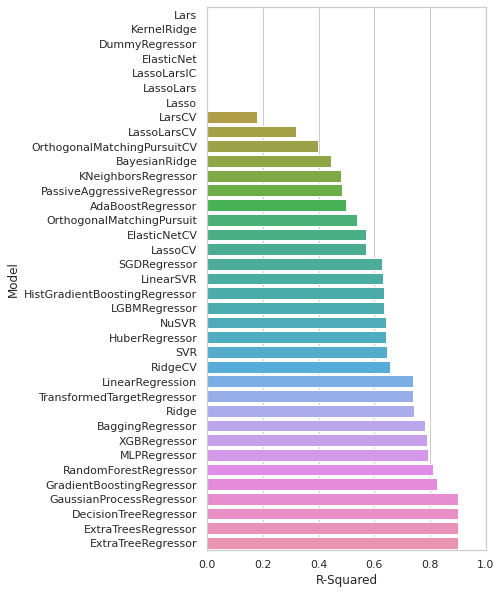

In [112]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

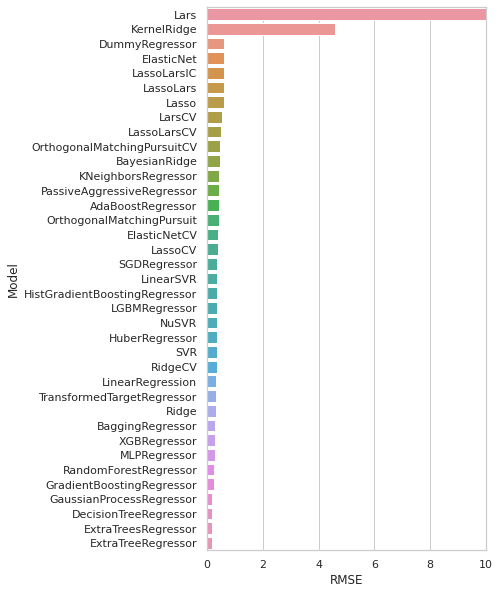

In [113]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

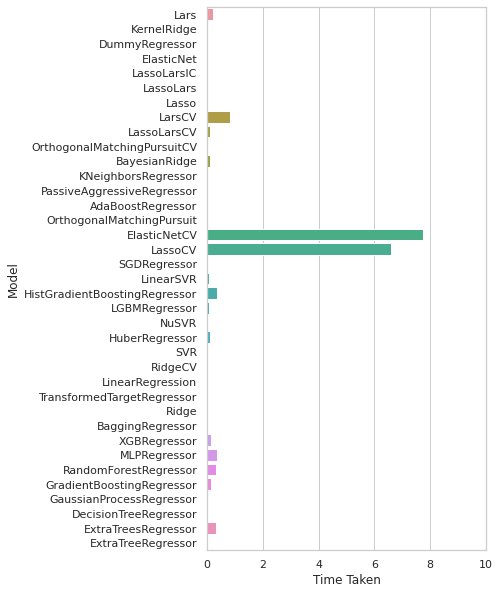

In [114]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

QSAR Model Building of Acetylcholinesterase Inhibitors
Chanin Nantasenamat

Data Professor YouTube channel, http://youtube.com/dataprofessor

In [115]:
import pandas as pd

In [116]:
dataset = pd.read_csv('coronavirus_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [117]:
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.06
1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.70
2,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.52
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.82
4,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.37
166,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.26
167,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.39
168,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.49


In [118]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
166,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
167,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
168,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [119]:
Y = dataset.iloc[:,-1]
Y

0     3.06
1     3.70
2     3.52
3     4.82
4     5.00
      ... 
165   5.37
166   5.26
167   5.39
168   5.49
169   5.06
Name: pIC50, Length: 170, dtype: float64

In [120]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP20,PubchemFP21,PubchemFP33,PubchemFP37,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP148,PubchemFP149,PubchemFP150,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP185,PubchemFP186,PubchemFP192,PubchemFP193,PubchemFP199,PubchemFP255,PubchemFP256,PubchemFP257,PubchemFP259,PubchemFP261,PubchemFP285,PubchemFP293,PubchemFP294,PubchemFP299,PubchemFP300,PubchemFP305,PubchemFP308,PubchemFP335,PubchemFP338,PubchemFP340,PubchemFP341,...,PubchemFP686,PubchemFP687,PubchemFP688,PubchemFP689,PubchemFP690,PubchemFP692,PubchemFP693,PubchemFP695,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP700,PubchemFP701,PubchemFP704,PubchemFP705,PubchemFP710,PubchemFP712,PubchemFP713,PubchemFP714,PubchemFP725,PubchemFP734,PubchemFP735,PubchemFP736,PubchemFP740,PubchemFP755,PubchemFP756,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP788,PubchemFP797,PubchemFP798,PubchemFP799,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,1,1,1,1,...,1,1,1,0,0,1,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,1,1,1,1,...,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,1,1,1,...,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,1,1,1,...,0,0,1,1,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
166,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
167,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
168,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
X.to_csv('descriptor_list.csv', index = False)

# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [123]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8353961010906583

In [124]:
Y_pred = model.predict(X)
Y_pred

array([3.59140024, 3.87811816, 3.65608894, 4.78735276, 4.79213195,
       4.45734521, 3.65160934, 4.59995822, 4.73323951, 4.38702088,
       4.50699089, 4.36232927, 4.39384855, 4.43574611, 4.33393218,
       5.58567464, 5.39239873, 5.34506961, 4.88447376, 5.46072958,
       5.18091573, 4.9808662 , 4.98477847, 5.22097158, 4.31986047,
       4.31986047, 4.37007378, 4.35582964, 4.3142814 , 4.48000277,
       4.48000277, 4.53231893, 4.32264862, 4.32264862, 4.33449772,
       4.40040435, 5.04049413, 5.1319111 , 5.00695943, 5.29200862,
       4.44561064, 4.67737361, 4.58252574, 4.91964789, 4.83934338,
       5.09708846, 4.75489992, 4.83934338, 4.83934338, 5.01639954,
       4.75489992, 3.69444406, 3.69444406, 4.08760777, 3.89963723,
       3.98876023, 3.83996543, 3.70800232, 4.00067912, 4.80982032,
       4.36120323, 4.36120323, 4.36120323, 3.90322512, 4.49575001,
       3.81192178, 4.54753853, 4.27196553, 4.35483232, 4.34897136,
       4.24200956, 4.35494195, 4.35291914, 4.6246905 , 5.08902

In [125]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.07
Coefficient of determination (R^2): 0.84


In [126]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

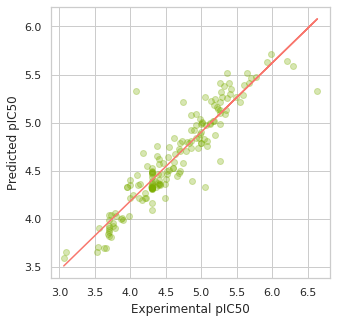

In [127]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

In [128]:
import pickle

In [130]:
pickle.dump(model, open('coronavirus_06_model.pkl', 'wb'))